In [1]:
from tensorflow import keras
from matplotlib import pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import random
import tensorflow as tf
from matplotlib  import rc
from glob import glob
rootdir = '/home/oliver/Documents/PhD/Projects/NNaglow/boxfit/final/'

In [2]:
model_ism = keras.models.load_model(rootdir+'model-ism-final.hdf5', compile=False)
model_wind = keras.models.load_model(rootdir+'model-wind-final.hdf5', compile=False)

In [3]:
rootname='data/boxfit_ism_final'
train_dataset_ism = pd.read_csv(rootdir+rootname+'_trainfeatures.csv')
test_dataset_ism = pd.read_csv(rootdir+rootname+'_testfeatures.csv')
train_labels_ism = pd.read_csv(rootdir+rootname+'_trainlabels.csv')
test_labels_ism = pd.read_csv(rootdir+rootname+'_testlabels.csv')

rootname='data/boxfit_wind_final'
train_dataset_wind = pd.read_csv(rootdir+rootname+'_trainfeatures.csv')
test_dataset_wind = pd.read_csv(rootdir+rootname+'_testfeatures.csv')
train_labels_wind = pd.read_csv(rootdir+rootname+'_trainlabels.csv')
test_labels_wind = pd.read_csv(rootdir+rootname+'_testlabels.csv')

In [4]:
scaler_in_ism = StandardScaler()
train_dataset_scaled_ism = scaler_in_ism.fit_transform(train_dataset_ism)
test_dataset_scaled_ism = scaler_in_ism.transform(test_dataset_ism)
scaler_out_ism= StandardScaler()
train_labels_scaled_ism = scaler_out_ism.fit_transform(train_labels_ism)

scaler_in_wind = StandardScaler()
train_dataset_scaled_wind = scaler_in_wind.fit_transform(train_dataset_wind)
test_dataset_scaled_wind = scaler_in_wind.transform(test_dataset_wind)
scaler_out_wind= StandardScaler()
train_labels_scaled_wind = scaler_out_wind.fit_transform(train_labels_wind)

In [19]:
X = train_dataset_ism
Xmean = X.mean(axis=0).values
Xstd = X.std(axis=0).values

Y = train_labels_ism
Ymean = Y.mean(axis=0).values
Ystd = Y.std(axis=0).values

scale_facs = np.append(np.c_[Xmean,Xstd],np.c_[Ymean,Ystd])
print(Xstd - scale_facs[:-234][1::2])
np.savetxt(rootdir+'scale_facs_ism_final.csv',scale_facs,delimiter=',')

X = train_dataset_wind
Xmean = X.mean(axis=0).values
Xstd = X.std(axis=0).values

Y = train_labels_wind
Ymean = Y.mean(axis=0).values
Ystd = Y.std(axis=0).values

scale_facs = np.append(np.c_[Xmean,Xstd],np.c_[Ymean,Ystd])
print(Xstd - scale_facs[:-234][1::2])
np.savetxt(rootdir+'scale_facs_wind_final.csv',scale_facs,delimiter=',')

[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]


In [14]:
nids = np.arange(20,2020,20)
NNisms = []
NNwinds = []
for n in nids:
    NNisms.append('model-stdsc-'+str(n)+'.hdf5')
    NNwinds.append('model-wind-stdsc-'+str(n)+'.hdf5')
ism_errs_test = []
wind_errs_test = []
for NN in NNisms:
    model_ism = keras.models.load_model(rootdir+'NNs/'+NN,compile=False)
    test_predictions_ism = model_ism.predict(test_dataset_scaled_ism)
    test_predictions_unscaled_ism = scaler_out_ism.inverse_transform(test_predictions_ism)
    test_predictions_ism = 10**test_predictions_unscaled_ism
    labels_ism = 10**test_labels_ism
    err_ism = (test_predictions_ism-labels_ism)/labels_ism
    ism_errs_test.append(np.nanmedian(abs(err_ism)))
    print(NN)    
np.save('ism_errs_stdsc_test.npy',ism_errs_test)
for NN in NNwinds:
    model_wind = keras.models.load_model(rootdir+'NNs/'+NN,compile=False)
    test_predictions_wind = model_wind.predict(test_dataset_scaled_wind)
    test_predictions_unscaled_wind = scaler_out_wind.inverse_transform(test_predictions_wind)
    test_predictions_wind = 10**test_predictions_unscaled_wind
    labels_wind = 10**test_labels_wind
    err_wind = (test_predictions_wind-labels_wind)/labels_wind
    wind_errs_test.append(np.nanmedian(abs(err_wind)))
    print(NN)    
np.save('wind_errs_stdsc_test.npy',wind_errs_test)


model-stdsc-20.hdf5
model-stdsc-40.hdf5
model-stdsc-60.hdf5
model-stdsc-80.hdf5
model-stdsc-100.hdf5
model-stdsc-120.hdf5
model-stdsc-140.hdf5
model-stdsc-160.hdf5
model-stdsc-180.hdf5
model-stdsc-200.hdf5
model-stdsc-220.hdf5
model-stdsc-240.hdf5
model-stdsc-260.hdf5
model-stdsc-280.hdf5
model-stdsc-300.hdf5
model-stdsc-320.hdf5
model-stdsc-340.hdf5
model-stdsc-360.hdf5
model-stdsc-380.hdf5
model-stdsc-400.hdf5
model-stdsc-420.hdf5
model-stdsc-440.hdf5
model-stdsc-460.hdf5


<ipython-input-14-d45389b3dbf0>:14: RuntimeWarning: overflow encountered in power
  test_predictions_ism = 10**test_predictions_unscaled_ism


model-stdsc-480.hdf5
model-stdsc-500.hdf5
model-stdsc-520.hdf5
model-stdsc-540.hdf5
model-stdsc-560.hdf5
model-stdsc-580.hdf5
model-stdsc-600.hdf5
model-stdsc-620.hdf5
model-stdsc-640.hdf5
model-stdsc-660.hdf5
model-stdsc-680.hdf5
model-stdsc-700.hdf5
model-stdsc-720.hdf5
model-stdsc-740.hdf5
model-stdsc-760.hdf5
model-stdsc-780.hdf5
model-stdsc-800.hdf5
model-stdsc-820.hdf5
model-stdsc-840.hdf5
model-stdsc-860.hdf5
model-stdsc-880.hdf5
model-stdsc-900.hdf5
model-stdsc-920.hdf5
model-stdsc-940.hdf5
model-stdsc-960.hdf5
model-stdsc-980.hdf5
model-stdsc-1000.hdf5
model-stdsc-1020.hdf5
model-stdsc-1040.hdf5
model-stdsc-1060.hdf5
model-stdsc-1080.hdf5
model-stdsc-1100.hdf5
model-stdsc-1120.hdf5
model-stdsc-1140.hdf5
model-stdsc-1160.hdf5
model-stdsc-1180.hdf5
model-stdsc-1200.hdf5
model-stdsc-1220.hdf5
model-stdsc-1240.hdf5
model-stdsc-1260.hdf5
model-stdsc-1280.hdf5
model-stdsc-1300.hdf5
model-stdsc-1320.hdf5
model-stdsc-1340.hdf5
model-stdsc-1360.hdf5
model-stdsc-1380.hdf5
model-stdsc-14

<ipython-input-14-d45389b3dbf0>:24: RuntimeWarning: overflow encountered in power
  test_predictions_wind = 10**test_predictions_unscaled_wind


model-wind-stdsc-400.hdf5
model-wind-stdsc-420.hdf5
model-wind-stdsc-440.hdf5
model-wind-stdsc-460.hdf5
model-wind-stdsc-480.hdf5
model-wind-stdsc-500.hdf5
model-wind-stdsc-520.hdf5
model-wind-stdsc-540.hdf5
model-wind-stdsc-560.hdf5
model-wind-stdsc-580.hdf5
model-wind-stdsc-600.hdf5
model-wind-stdsc-620.hdf5
model-wind-stdsc-640.hdf5
model-wind-stdsc-660.hdf5
model-wind-stdsc-680.hdf5
model-wind-stdsc-700.hdf5
model-wind-stdsc-720.hdf5
model-wind-stdsc-740.hdf5
model-wind-stdsc-760.hdf5
model-wind-stdsc-780.hdf5
model-wind-stdsc-800.hdf5
model-wind-stdsc-820.hdf5
model-wind-stdsc-840.hdf5
model-wind-stdsc-860.hdf5
model-wind-stdsc-880.hdf5
model-wind-stdsc-900.hdf5
model-wind-stdsc-920.hdf5
model-wind-stdsc-940.hdf5
model-wind-stdsc-960.hdf5
model-wind-stdsc-980.hdf5
model-wind-stdsc-1000.hdf5
model-wind-stdsc-1020.hdf5
model-wind-stdsc-1040.hdf5
model-wind-stdsc-1060.hdf5
model-wind-stdsc-1080.hdf5
model-wind-stdsc-1100.hdf5
model-wind-stdsc-1120.hdf5
model-wind-stdsc-1140.hdf5
mode

In [17]:
trainingsize_NNs = ['boxfit_ism_stdsc_5623.h5','boxfit_ism_stdsc_11246.h5', 'boxfit_ism_stdsc_22493.h5', 'boxfit_ism_stdsc_44987.h5', 'boxfit_ism_stdsc_89975.h5', 'boxfit_ism_stdsc_179950.hdf5'] 
trainingsize = [5623,11246,22493,44987,89975,179950]
trainingsize_errs = []
for NN in trainingsize_NNs:
    model = keras.models.load_model(rootdir+'NNs/trainingdata_subset/'+NN,compile=False)
    test_predictions = model.predict(test_dataset_scaled_ism)
    test_predictions_unscaled = scaler_out_ism.inverse_transform(test_predictions)
    test_predictions = 10**test_predictions_unscaled
    labels = 10**test_labels_ism
    err= (test_predictions-labels)/labels
    trainingsize_errs.append(np.nanmedian(abs(err)))
np.save('ism_errs_trainingsizze.npy',trainingsize_errs)

[0.2604881448162578, 0.115146075082638, 0.05729970116995764, 0.040501128054733715, 0.03523870665444025, 0.0258748171872977]


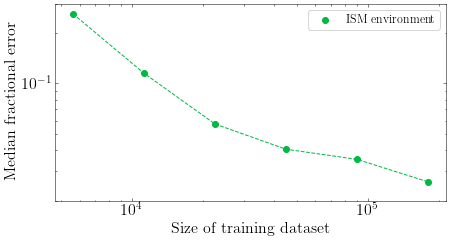

In [21]:
print(trainingsize_errs)
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
plt.figure(figsize=(7,3.625))
plt.style.use('science')
plt.scatter(trainingsize,trainingsize_errs,c='C1',label='ISM environment')
plt.plot(trainingsize,trainingsize_errs,linestyle='--',c='C1')
matplotlib.rcParams['legend.frameon'] = True
plt.legend(loc='upper right',fontsize=12)
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim([0.02,0.3])
plt.xlabel(r'Size of training dataset',fontsize=16)
plt.ylabel(r'Median fractional error',fontsize=16)
plt.savefig('plots/loss_trainingsize.pdf',dpi=300)
plt.show()

Minimum median error for ISM environment: 0.013051957018743614 for NN model: model-stdsc-2000.hdf5
Minimum median error for wind environment: 0.016750144506444534 for NN model: model-wind-stdsc-1900.hdf5


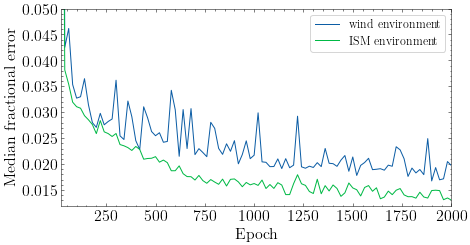

In [14]:
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
nids = np.arange(20,2020,20)

ism_errs_test = np.load('ism_errs_stdsc_test.npy')
wind_errs_test = np.load('wind_errs_stdsc_test.npy')

print('Minimum median error for ISM environment: ' +str(ism_errs_test.min()) +' for NN model: '+ 'model-stdsc-'+str(nids[ism_errs_test.argmin()]) +'.hdf5')
print('Minimum median error for wind environment: ' +str(wind_errs_test.min()) +' for NN model: '+ 'model-wind-stdsc-'+str(nids[wind_errs_test.argmin()]) +'.hdf5')
plt.style.use('science')
plt.figure(figsize=(7,3.625))
plt.plot(nids,wind_errs_test,label='wind environment')
plt.plot(nids,ism_errs_test,label='ISM environment')
ax = plt.gca()
plt.xlabel(r'Epoch',fontsize=16)
plt.ylabel(r'Median fractional error',fontsize=16)
matplotlib.rcParams['legend.frameon'] = True
plt.legend(loc='upper right',fontsize=12)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim([0.012,0.05])
plt.margins(0,0)
plt.savefig('plots/loss_per_epoch.pdf',dpi=300)

In [5]:
model_ism = keras.models.load_model(rootdir+'model-ism-final.hdf5', compile=False)
model_wind = keras.models.load_model(rootdir+'model-wind-final.hdf5', compile=False)

test_predictions_ism = model_ism.predict(test_dataset_scaled_ism)
test_predictions_unscaled_ism = scaler_out_ism.inverse_transform(test_predictions_ism)
test_predictions_ism = 10**test_predictions_unscaled_ism
labels_ism = 10**test_labels_ism

test_predictions_wind = model_wind.predict(test_dataset_scaled_wind)
test_predictions_unscaled_wind = scaler_out_wind.inverse_transform(test_predictions_wind)
test_predictions_wind = 10**test_predictions_unscaled_wind
labels_wind = 10**test_labels_wind


<ipython-input-5-3aff07dec170>:5: RuntimeWarning: overflow encountered in power
  test_predictions_ism = 10**test_predictions_unscaled_ism


1.1009068489074707


<ipython-input-5-3aff07dec170>:13: RuntimeWarning: overflow encountered in power
  test_predictions_wind = 10**test_predictions_unscaled_wind


1.0826367338740546 1000.0
Median MeanFE pruned ISM
0.015985903408886365
Median MeanFE all ISM
0.020319222827582143


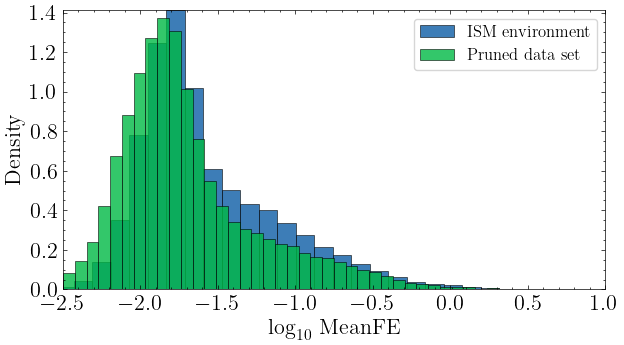

Median MeanFE pruned wind
0.0257709521463114
Median MeanFE all wind
0.03363713503476667


<ipython-input-47-7051180abcfd>:46: RuntimeWarning: Mean of empty slice
  print(np.nanmedian(np.nanmean(abs(err_wind_cut),axis=1)))
<ipython-input-47-7051180abcfd>:51: RuntimeWarning: Mean of empty slice
  plt.hist(np.log10(np.nanmean(abs(err_wind_cut),axis=1)),bins=100,color='mediumturquoise',histtype='barstacked',edgecolor='black',linewidth=0.5,alpha=0.8,label=r'Pruned data set',density=True)


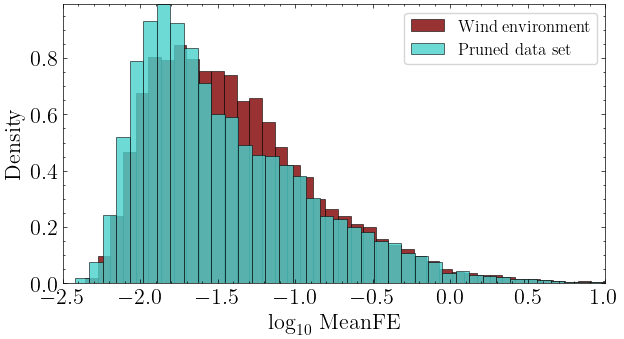

Median MaxFE pruned ISM
0.062037154366070796
Median MaxFE all ISM
0.10413532653825684


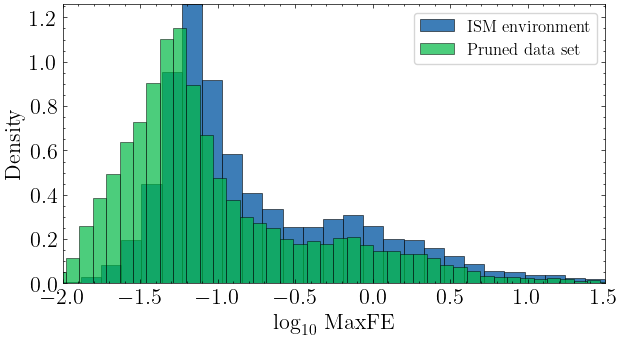

Median MaxFE pruned wind
0.09893940041506374
0.4672853098458635
Median MaxFE all wind
0.22842435056082822
0.5909615182971585


<ipython-input-47-7051180abcfd>:84: RuntimeWarning: All-NaN axis encountered
  MaxFE_wind_cut = np.nanmax(abs(err_wind_cut),axis=1)
<ipython-input-47-7051180abcfd>:93: RuntimeWarning: All-NaN axis encountered
  plt.hist(np.log10(np.nanmax(abs(err_wind_cut),axis=1)),bins=100,color='mediumturquoise',histtype='barstacked',edgecolor='black',linewidth=0.5,alpha=0.7,label=r'Pruned data set',density=True)


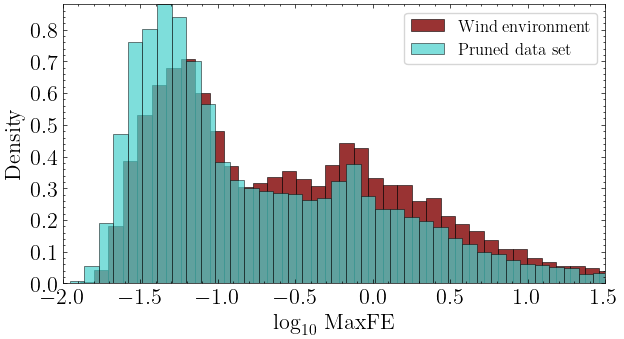

In [47]:
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
plt.style.use('science')


zerocount_ism = np.sum(np.isnan(labels_ism),axis=1)
zerocount_wind = np.sum(np.isnan(labels_wind),axis=1)
err_ism = (test_predictions_ism-labels_ism)/labels_ism
err_wind = (test_predictions_wind-labels_wind)/labels_wind

tdata = np.geomspace(0.1,1000,117)
tbegin = 30
tend = 116
print(tdata[tbegin],tdata[tend])
test_predictions_ism_cut = test_predictions_ism[:,tbegin:tend+1]
test_predictions_wind_cut = test_predictions_wind[:,tbegin:tend+1]
labels_ism_cut = labels_ism.iloc[:,tbegin:tend+1]
labels_wind_cut = labels_wind.iloc[:,tbegin:tend+1]
zerocount_ism_cut = np.sum(np.isnan(labels_ism_cut),axis=1)
zerocount_wind_cut = np.sum(np.isnan(labels_wind_cut),axis=1)
err_ism_cut = (test_predictions_ism_cut-labels_ism_cut)/labels_ism_cut
err_wind_cut = (test_predictions_wind_cut-labels_wind_cut)/labels_wind_cut

print('Median MeanFE pruned ISM')
print(np.nanmedian(np.nanmean(abs(err_ism_cut),axis=1)))
print('Median MeanFE all ISM')
print(np.nanmedian(np.nanmean(abs(err_ism),axis=1)))


plt.figure(figsize=(7,3.625))
plt.hist(np.log10(np.nanmean(abs(err_ism),axis=1)),bins=100,histtype='barstacked',edgecolor='black',linewidth=0.5,alpha=0.8,label=r'ISM environment',density=True)
plt.hist(np.log10(np.nanmean(abs(err_ism_cut),axis=1)),bins=100,histtype='barstacked',edgecolor='black',linewidth=0.5,alpha=0.8,label=r'Pruned data set',density=True)
plt.xlabel(r'$\mathrm{\log_{10}}$ MeanFE',fontsize=16)
plt.ylabel(r'Density',fontsize=16)
plt.xlim([-2.5,1.0])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
matplotlib.rcParams['legend.frameon'] = True
plt.legend(loc='upper right',fontsize=12)
plt.margins(0,0)
plt.savefig('plots/LC_mean_ism.pdf',dpi=300)
plt.show()

print('Median MeanFE pruned wind')
print(np.nanmedian(np.nanmean(abs(err_wind_cut),axis=1)))
print('Median MeanFE all wind')
print(np.nanmedian(np.nanmean(abs(err_wind),axis=1)))
plt.figure(figsize=(7,3.625))
plt.hist(np.log10(np.nanmean(abs(err_wind),axis=1)),bins=100,color='maroon',histtype='barstacked',edgecolor='black',linewidth=0.5,alpha=0.8,label=r'Wind environment',density=True)
plt.hist(np.log10(np.nanmean(abs(err_wind_cut),axis=1)),bins=100,color='mediumturquoise',histtype='barstacked',edgecolor='black',linewidth=0.5,alpha=0.8,label=r'Pruned data set',density=True)
plt.xlabel(r'$\mathrm{\log_{10}}$ MeanFE',fontsize=16)
plt.ylabel(r'Density',fontsize=16)
plt.xlim([-2.5,1.0])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
matplotlib.rcParams['legend.frameon'] = True
plt.legend(loc='upper right',fontsize=12)
plt.margins(0,0)
plt.savefig('plots/LC_mean_wind.pdf',dpi=300)
plt.show()

print('Median MaxFE pruned ISM')
print(np.nanmedian(np.nanmax(abs(err_ism_cut),axis=1)))
print('Median MaxFE all ISM')
print(np.nanmedian(np.nanmax(abs(err_ism),axis=1)))
plt.figure(figsize=(7,3.625))
plt.hist(np.log10(np.nanmax(abs(err_ism),axis=1)),bins=100,histtype='barstacked',edgecolor='black',linewidth=0.5,alpha=0.8,label=r'ISM environment',density=True)
plt.hist(np.log10(np.nanmax(abs(err_ism_cut),axis=1)),bins=100,histtype='barstacked',edgecolor='black',linewidth=0.5,alpha=0.7,label=r'Pruned data set',density=True)
plt.xlabel(r'$\mathrm{\log_{10}}$ MaxFE',fontsize=16)
plt.ylabel(r'Density',fontsize=16)
plt.xlim([-2.,1.5])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
matplotlib.rcParams['legend.frameon'] = True
plt.legend(loc='upper right',fontsize=12)
plt.margins(0,0)
plt.savefig('plots/LC_max_ism.pdf',dpi=300)
plt.show()

print('Median MaxFE pruned wind')
MaxFE_wind_cut = np.nanmax(abs(err_wind_cut),axis=1)
print(np.nanmedian(MaxFE_wind_cut))
MaxFE_wind = np.nanmax(abs(err_wind),axis=1)
print('Median MaxFE all wind')
print(np.nanmedian(MaxFE_wind))
plt.figure(figsize=(7,3.625))
plt.hist(np.log10(np.nanmax(abs(err_wind),axis=1)),bins=100,color = 'maroon',histtype='barstacked',edgecolor='black',linewidth=0.5,alpha=0.8,label=r'Wind environment',density=True)
plt.hist(np.log10(np.nanmax(abs(err_wind_cut),axis=1)),bins=100,color='mediumturquoise',histtype='barstacked',edgecolor='black',linewidth=0.5,alpha=0.7,label=r'Pruned data set',density=True)
plt.xlabel(r'$\mathrm{\log_{10}}$ MaxFE',fontsize=16)
plt.ylabel(r'Density',fontsize=16)
plt.xlim([-2.,1.5])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
matplotlib.rcParams['legend.frameon'] = True
plt.legend(loc='upper right',fontsize=12)
plt.margins(0,0)
plt.savefig('plots/LC_max_wind.pdf',dpi=300)
plt.show()

In [49]:
notcovered_ism = len(train_labels_ism[np.any(np.isnan(train_labels_ism.iloc[:,:]),axis=1)])/len(train_labels_ism)
notcovered_wind = len(train_labels_wind[np.any(np.isnan(train_labels_wind.iloc[:,:]),axis=1)])/len(train_labels_wind)
print(notcovered_ism,notcovered_wind)

0.3246679633231453 0.4406664142370314


0.12097747512790062 0.4595405624604732


(array([ 18.,  62., 109.,  72.,  14.,  13.,   9.,   3.,   2.,   1.]),
 array([-1.73868821, -1.41857958, -1.09847096, -0.77836234, -0.45825372,
        -0.1381451 ,  0.18196352,  0.50207214,  0.82218076,  1.14228938,
         1.462398  ]),
 <BarContainer object of 10 artists>)

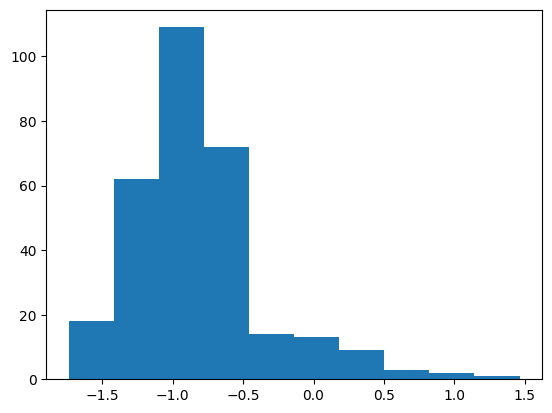

In [60]:
GRB_file = 'grb970508data-cropped.dat'
colnames=['time', 'freq', 'flux', 'error']
GRB_data = pd.read_csv(GRB_file,skiprows=1,names=colnames) 
mask = GRB_data['flux']!=0
FE = GRB_data['error'][mask]/abs(GRB_data['flux'][mask])
print(np.nanmedian(FE),np.nanmean(FE))
plt.hist(np.log10(FE))